## Entrega del Trabajo Práctico 3 (FINAL) de PEIA
### Miembros del Grupo

- **José Perez.** Alumno Nro. ***i0907*** - email: joseperez190498@gmail.com
- **Matías Tripode.** Alumno Nro. ***a1907*** - email: matiastripode@gmail.com
- **Gustavo Ramoscelli.** Alumno Nro. ***a1908*** - email: gustavoramoscelli@gmail.com 

### Enunciado

Siguiendo con la historia de Don Francisco, con el tiempo y gracias a los análisis de Matías, el pequeño comerciante de barrio cuenta hoy con 5 supermercados: **'Santa Ana', 'La Floresta', 'Los Cedros', 'Palermo' y 'Córdoba'**.  
También Matías ha avanzado en la Especialización en Inteligencia Artificial. Un día Don Francisco le plantea algunas inquietudes adicionales:

1. Don Francisco quiere entender mejor las ventas por mes del supermercado **'Santa Ana'**.
2. Más aún, Don Francisco no sabe si puede estar seguro de que las ventas son las mismas en todos los supermercados o si hay alguno que se comporte mejor que los demás, y si alguna de las tiendas necesita más atención porque sus ventas sean peores que los demás.

Con base en lo anterior:

1. **(2.5 puntos)** Determinen intervalos de confianza empíricos para el supermercado **'Santa Ana'** en cada mes, para significancias del **95 %** y el **99 %**.
2. **(2.5 puntos)** Realicen pruebas **ANOVA** para determinar si las ventas esperadas de todas las tiendas son iguales o no, con significancia del **95 %**.
3. **(2.5 puntos)** Identifiquen la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas y realicen una prueba de hipótesis para determinar si la diferencia entre ellas es distinta de cero o no.

Deben realizar un informe en un documento PDF, en donde queden claros los siguientes aspectos:

1. Planteamiento de los problemas de investigación.
2. Procesamiento realizado a los datos.
3. Resultados encontrados.
4. Análisis y conclusiones.

Deben entregar también el código utilizado en el proceso.  


### Importación y exploración de datos

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
data = pd.read_excel('Datos_examen_final_19Co2024_Grupo3.xlsx')

# Mostrar las primeras filas
print(data.head())

       Fecha        Ventas
0 2023-01-01  16243.573114
1 2023-01-02  18362.442131
2 2023-01-03  15275.825306
3 2023-01-04  20177.937740
4 2023-01-05  20489.996198


### 1) Intervalos de confianza empíricos
Obetención de los intervalos de confianza empíricos para el supermercado **'Santa Ana'** en cada mes, para significancias del **95 %** y el **99 %**.

In [10]:
# Convertir la columna 'Fecha' a tipo datetime para agrupar por mes
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Agregar una columna de año-mes
data['Mes'] = data['Fecha'].dt.to_period('M')

# Agrupar por mes y calcular el intervalo de confianza
intervalos_confianza = []

for mes, grupo in data.groupby('Mes'):
    ventas = grupo['Ventas']
    mean = ventas.mean()
    sem = stats.sem(ventas)  # Error estándar de la media
    
    # Intervalos de confianza al 95% y 99%
    ci_95 = stats.t.interval(0.95, len(ventas)-1, loc=mean, scale=sem)
    ci_99 = stats.t.interval(0.99, len(ventas)-1, loc=mean, scale=sem)
    
    intervalos_confianza.append({
        'Mes': mes,
        'Media': round(mean, 2),
        'IC_95_Lower': round(ci_95[0], 1),
        'IC_95_Upper': round(ci_95[1], 1),
        'IC_99_Lower': round(ci_99[0], 1),
        'IC_99_Upper': round(ci_99[1], 1)
    })
# Convertir los resultados a un DataFrame
df_intervalos = pd.DataFrame(intervalos_confianza)

# Mostrar los resultados
print(df_intervalos)

        Mes     Media  IC_95_Lower  IC_95_Upper  IC_99_Lower  IC_99_Upper
0   2023-01  17513.82      16736.9      18290.7      16467.7      18560.0
1   2023-02  20851.58      19783.0      21920.1      19408.7      22294.5
2   2023-03  22664.68      21821.3      23508.0      21529.1      23800.3
3   2023-04  20794.88      19814.5      21775.3      19473.6      22116.2
4   2023-05  22072.86      21243.7      22902.0      20956.4      23189.3
5   2023-06  22969.14      22037.7      23900.6      21713.8      24224.5
6   2023-07  21842.32      20860.4      22824.2      20520.2      23164.5
7   2023-08  23184.96      22317.8      24052.1      22017.3      24352.7
8   2023-09  22811.09      21838.8      23783.3      21500.8      24121.4
9   2023-10  23111.77      22082.4      24141.2      21725.7      24497.9
10  2023-11  22504.71      21698.7      23310.8      21418.4      23591.0
11  2023-12  21062.23      20054.5      22070.0      19705.2      22419.2


#### Análisis del Resultado

El intervalo de confianza al 95% nos indica que tenemos un 95% de confianza de que el verdadero promedio de ventas mensuales de "Santa Ana" está dentro de ese rango. Lo mismo aplica para el intervalo al 99%, pero con un mayor nivel de confianza y, por lo tanto, un intervalo más amplio.

#### Visualización de los datos



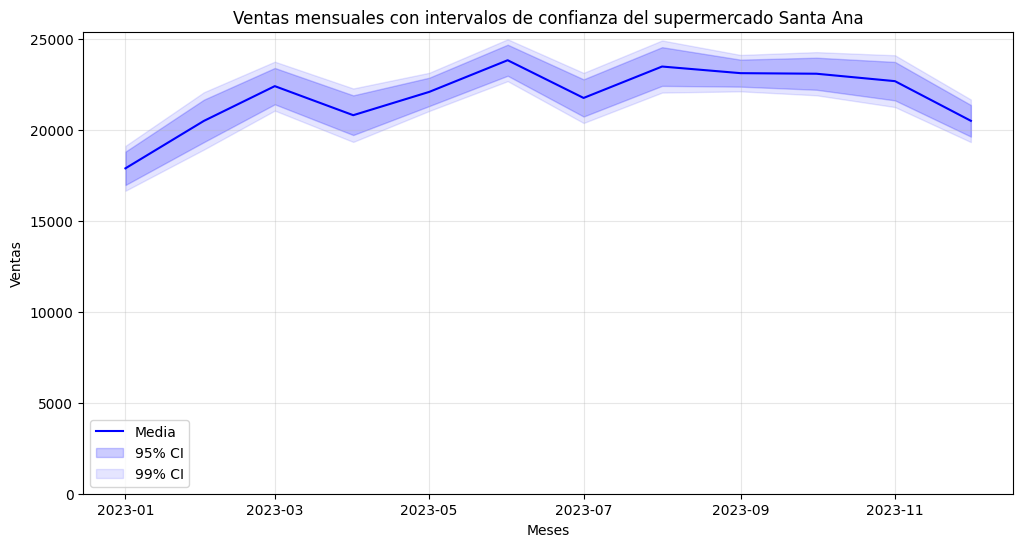

In [3]:
# Graficar los datos
plt.figure(figsize=(12, 6))

# Línea de la media
plt.plot(df_intervalos['Mes'].dt.to_timestamp(), df_intervalos['Media'], label='Media', color='blue')

# Relleno para intervalos de confianza al 95%
plt.fill_between(df_intervalos['Mes'].dt.to_timestamp(), df_intervalos['IC_95_Lower'], df_intervalos['IC_95_Upper'], 
                 color='blue', alpha=0.2, label='95% CI')

# Relleno para intervalos de confianza al 99%
plt.fill_between(df_intervalos['Mes'].dt.to_timestamp(), df_intervalos['IC_99_Lower'], df_intervalos['IC_99_Upper'], 
                 color='blue', alpha=0.1, label='99% CI')

# Ajustar el origen del eje y a 0
plt.ylim(0, None)

plt.title('Ventas mensuales con intervalos de confianza del supermercado Santa Ana')
plt.xlabel('Meses')
plt.ylabel('Ventas')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### 2) Pruebas ANOVA entre tiendas

#### Hipótesis

- **$H_0$**: Las medias de ventas de todas las tiendas son iguales.
- **$H_1$**: Al menos una media de ventas es diferente.
El valor $p$ es una medida estadística que nos indica la probabilidad de observar los datos obtenidos, o algo más extremo, asumiendo que la hipótesis nula ($H_0$) es verdadera. En el caso de la prueba ANOVA:

### Hipótesis en ANOVA:
1. **Hipótesis nula ($H_0$)**: Las medias de las ventas son iguales para todas las tiendas.
2. **Hipótesis alternativa ($H_1$)**: Al menos una de las medias de las ventas es diferente.

### Interpretación del valor $p$:
- Si el valor $p$ es **menor** que el nivel de significancia ($\alpha$ es 0.05 para un 95 % de confianza):
  - Se **rechaza** la hipótesis nula.
  - Concluimos que existen diferencias significativas en las medias de ventas entre al menos dos tiendas.
  
- Si el valor $p$ es **mayor o igual** que el nivel de significancia ($\alpha$):
  - No se puede rechazar la hipótesis nula.
  - Concluimos que no hay evidencia estadística suficiente para afirmar que las medias de ventas son diferentes entre las tiendas.

#### Realización del ANOVA

In [4]:
# Datos de las ventas de todas las tiendas
import pandas as pd
from scipy.stats import f_oneway

# Cargar las hojas del archivo Excel
file_path = 'Datos_examen_final_19Co2024_Grupo3.xlsx'
sheets = pd.ExcelFile(file_path)

# Crear un diccionario para almacenar las ventas de cada tienda
ventas_por_tienda = {}

# Leer las pestañas del archivo y extraer las ventas
for sheet_name in sheets.sheet_names:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    ventas_por_tienda[sheet_name] = data['Ventas']

# Realizar la prueba ANOVA
ventas = list(ventas_por_tienda.values())
anova_result = f_oneway(*ventas)

# Mostrar resultados
print("Resultado ANOVA:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Interpretación
alpha = 0.05 # sale del 95% de confianza
if anova_result.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las medias de ventas no son iguales para todas las tiendas.")
else:
    print("No se rechaza la hipótesis nula: las medias de ventas son iguales para todas las tiendas.")


Resultado ANOVA:
F-statistic: 114.4505102185901
P-value: 3.8904025989851754e-87
Rechazamos la hipótesis nula: las medias de ventas no son iguales para todas las tiendas.


### Visualización de las ventas

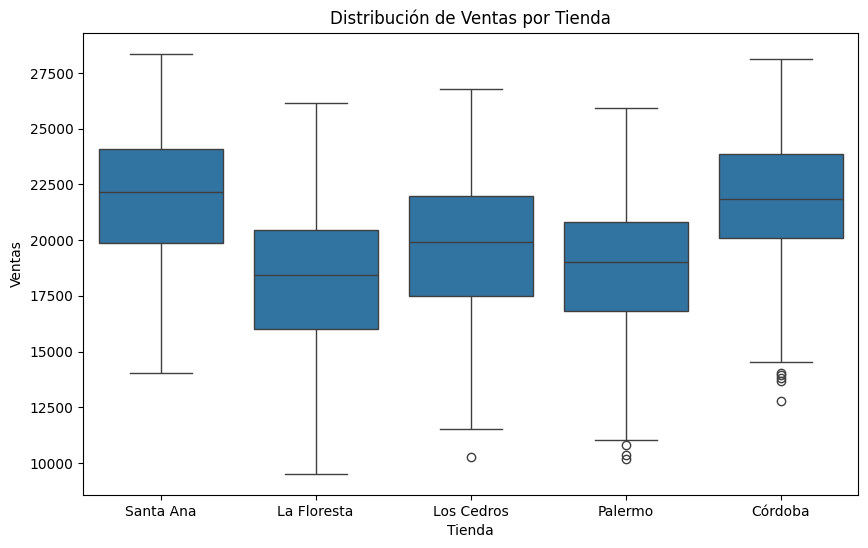

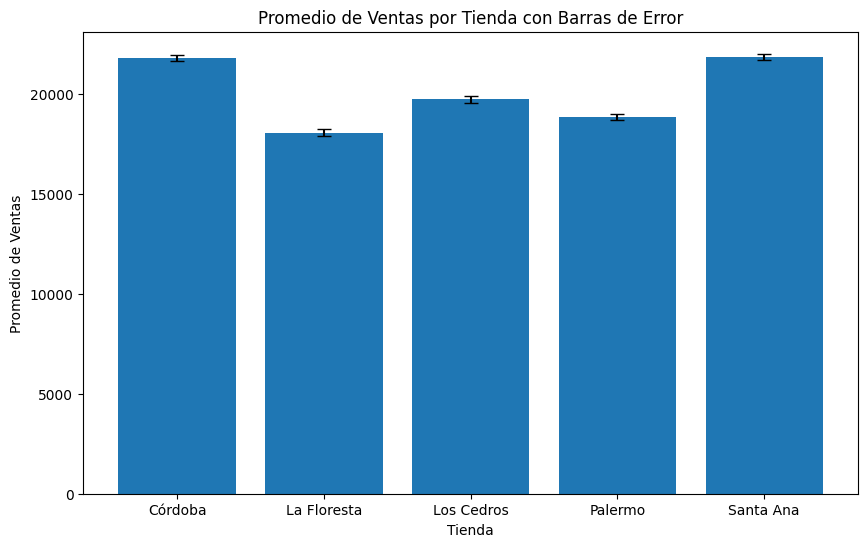

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data for visualization
file_path = 'Datos_examen_final_19Co2024_Grupo3.xlsx'
sheets = pd.ExcelFile(file_path)
all_data = []

for sheet_name in sheets.sheet_names:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    data['Tienda'] = sheet_name  # Add a column for the store name
    all_data.append(data)

# Combine all data into one DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tienda', y='Ventas', data=combined_data)
plt.title('Distribución de Ventas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas')
plt.show()

# Bar plot with error bars
plt.figure(figsize=(10, 6))
mean_sales = combined_data.groupby('Tienda')['Ventas'].mean()
std_error = combined_data.groupby('Tienda')['Ventas'].sem()

plt.bar(mean_sales.index, mean_sales, yerr=std_error, capsize=5)
plt.title('Promedio de Ventas por Tienda con Barras de Error')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Ventas')
plt.show()



#### Análisis del Resultado

Cómo el p-valor es menor que 0.05 (significancia del $95\%$), rechazamos la hipótesis nula y concluimos que existen diferencias significativas entre las medias de ventas de los supermecados.

### 3) Prueba de hipótesis entre tiendas con mayor y menor promedio de ventas

#### Prueba t para muestras independientes

Hipótesis:

- **H0**: La diferencia entre los promedios de ventas del supermercado con mayor promedio de ventas vs. el supermercado con menor promedio de ventas es cero ($\mu_1 - \mu_2 = 0$).
- **H1**: La diferencia entre los promedios de ventas del supermercado con mayor promedio de ventas vs. el supermercado con menor promedio de ventas es distinta de cero ($\mu_1 - \mu_2 \neq 0$).

In [6]:
import pandas as pd
from scipy.stats import ttest_ind

# Cargar las hojas del archivo Excel
file_path = 'Datos_examen_final_19Co2024_Grupo3.xlsx'
sheets = pd.ExcelFile(file_path)

# Crear un diccionario para almacenar las ventas de cada tienda
ventas_por_tienda = {}

# Leer las pestañas del archivo y extraer las ventas
for sheet_name in sheets.sheet_names:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    ventas_por_tienda[sheet_name] = data['Ventas']

# Calcular los promedios de ventas para cada tienda
promedios_ventas = {tienda: ventas.mean() for tienda, ventas in ventas_por_tienda.items()}

# Identificar la tienda con el mayor y menor promedio de ventas
tienda_mayor = max(promedios_ventas, key=promedios_ventas.get)
tienda_menor = min(promedios_ventas, key=promedios_ventas.get)

print(f"Tienda con mayor promedio de ventas: {tienda_mayor} - Promedio: {promedios_ventas[tienda_mayor]:.2f}")
print(f"Tienda con menor promedio de ventas: {tienda_menor} - Promedio: {promedios_ventas[tienda_menor]:.2f}")

# Obtener los datos de ventas para las dos tiendas
ventas_mayor = ventas_por_tienda[tienda_mayor]
ventas_menor = ventas_por_tienda[tienda_menor]

# Realizar prueba de hipótesis t
t_stat, p_value = ttest_ind(ventas_mayor, ventas_menor, equal_var=False)

print("\nPrueba de hipótesis:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value}")

# Interpretación
alpha = 0.01 # por ejemplo una significancia del 99%
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la diferencia entre los promedios de ventas es significativa.")
else:
    print("No se rechaza la hipótesis nula: la diferencia entre los promedios de ventas no es significativa.")

Tienda con mayor promedio de ventas: Santa Ana - Promedio: 21842.40
Tienda con menor promedio de ventas: La Floresta - Promedio: 18049.11

Prueba de hipótesis:
T-statistic: 16.2263
P-value: 1.0156317860191493e-50
Rechazamos la hipótesis nula: la diferencia entre los promedios de ventas es significativa.


#### Visualización de los datos

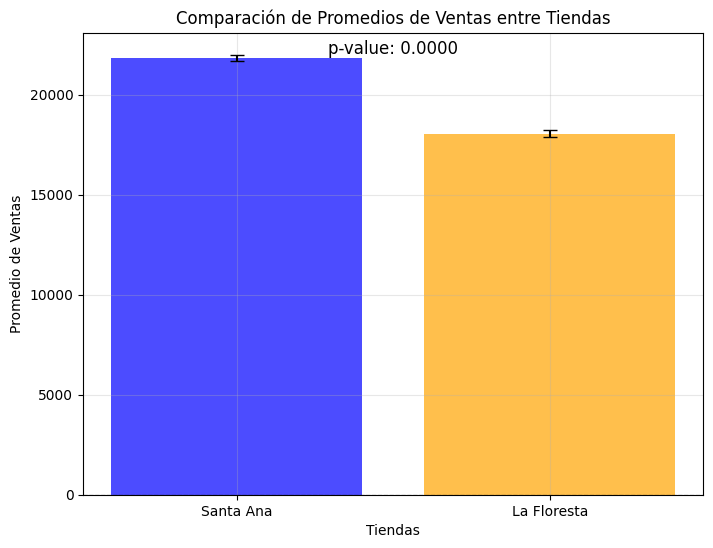

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd

# Cargar las hojas del archivo Excel
file_path = 'Datos_examen_final_19Co2024_Grupo3.xlsx'
sheets = pd.ExcelFile(file_path)

# Crear un diccionario para almacenar las ventas de cada tienda
ventas_por_tienda = {}

for sheet_name in sheets.sheet_names:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    ventas_por_tienda[sheet_name] = data['Ventas']

# Calcular los promedios y errores estándar
promedios_ventas = {tienda: ventas.mean() for tienda, ventas in ventas_por_tienda.items()}
sem_ventas = {tienda: ventas.sem() for tienda, ventas in ventas_por_tienda.items()}

# Identificar la tienda con mayor y menor promedio de ventas
tienda_mayor = max(promedios_ventas, key=promedios_ventas.get)
tienda_menor = min(promedios_ventas, key=promedios_ventas.get)

# Obtener datos de las dos tiendas
ventas_mayor = ventas_por_tienda[tienda_mayor]
ventas_menor = ventas_por_tienda[tienda_menor]

# Prueba de hipótesis t
t_stat, p_value = ttest_ind(ventas_mayor, ventas_menor, equal_var=False)

# Gráfico de barras
plt.figure(figsize=(8, 6))

x = [0, 1]
y = [promedios_ventas[tienda_mayor], promedios_ventas[tienda_menor]]
errors = [sem_ventas[tienda_mayor], sem_ventas[tienda_menor]]

plt.bar(x, y, yerr=errors, capsize=5, color=['blue', 'orange'], alpha=0.7, tick_label=[tienda_mayor, tienda_menor])

plt.title('Comparación de Promedios de Ventas entre Tiendas')
plt.ylabel('Promedio de Ventas')
plt.xlabel('Tiendas')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(alpha=0.3)

# Anotar resultados de la prueba
plt.text(0.5, max(y) + 200, f"p-value: {p_value:.4f}", ha='center', fontsize=12)

plt.show()


#### Análisis del Resultado

Como el p-valor excesivamente pequeño: $1\cdot10^{-50}$!!, entonces con una certeza muy cercana a la absoluta, rechazamos la hipótesis nula y concluimos que la diferencia entre los promedios de ventas del supermercado con mayor promedio de ventas vs. el supermercado con menor promedio de ventas es significativamente distinta de cero.
